In [1]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# [1] Import model
from sklearn.cluster import KMeans

# Evaluation of Clustering

Many times the data you will be working with will be multi-dimensional, making visualization difficult. As a consequence, the optimal number of groups is no longer obvious.

Clustering is an unsupervised learning type of problems, which mean you do not have a target to predict or ground truth. Therefore, you do not have an explicit metric that will tell you how good or bad are your cluster predictions, or if a set of cluster predictions is better than another.

However, you can have approximations of these goodness of fit evaluations, which we will allow you to choose an optimal (or close to optimal) k. We will cover in this notebook the most popular and used. In particular we will cover this evaluation techniques:

1. Elbow rule
2. Silhouette
3. Calinski-Harabasz Index
4. Davies-Bouldin Index

## Data

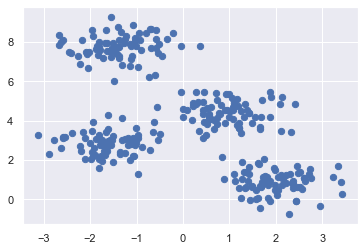

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=40);

## [1] Elbow Rule

We show in a graph the relationship between the number of clusters and the sum of square distances within the group (WCSS), then we select the number of groups where the change in WCSS begins to level out.

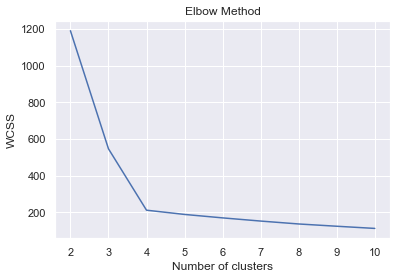

In [3]:
# Initialize vector of metrics
wcss = []

# Try values from k = 2 to k = 10
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot results
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## [2] Silhouette

The Silhouette Score and Silhouette Plot are used to measure the separation distance between clusters. It displays a measure of how close each point in a cluster is to points in the neighbouring clusters. This measure has a range of [-1, 1] and is a great tool to visually inspect the similarities within clusters and differences across clusters.

The Silhouette Score is calculated using the mean intra-cluster distance (i) and the mean nearest-cluster distance (n) for each sample. The Silhouette Coefficient for a sample is (n - i) / max(i, n).

n is the distance between each sample and the nearest cluster that the sample is not a part of while i is the mean distance within each cluster.

The higher the Silhouette Coefficients (the closer to +1), the further away the cluster’s samples are from the neighbouring clusters samples. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighbouring clusters. Negative values, instead, indicate that those samples might have been assigned to the wrong cluster. Averaging the Silhouette Coefficients, we can get to a global Silhouette Score which can be used to describe the entire population’s performance with a single value.

### Silhouette plot

In [4]:
# [2] Import metric
from sklearn.metrics import silhouette_samples

In [ ]:
?silhouette_samples

In [13]:
# [3] Define model
n_clusters = 4
model = KMeans(n_clusters = n_clusters, random_state=10)

# [4] Train model
cluster_labels = model.fit(X)

# [5] Predict
cluster_labels = model.predict(X)

# [6] Evaluate model
sample_silhouette_values = silhouette_samples(X, cluster_labels)
sample_silhouette_values

array([0.23097362, 0.77766385, 0.71784904, 0.78097006, 0.46667168,
       0.64793126, 0.64135581, 0.74213088, 0.64133793, 0.71367736,
       0.77083144, 0.70462553, 0.75495569, 0.65562681, 0.7080028 ,
       0.592872  , 0.75830238, 0.76676594, 0.64392698, 0.66222767,
       0.70148666, 0.76025257, 0.70176832, 0.75724827, 0.76456626,
       0.24494355, 0.79005776, 0.70706822, 0.65158013, 0.50129855,
       0.6991707 , 0.75127301, 0.6459895 , 0.60284372, 0.8083596 ,
       0.71770369, 0.76645428, 0.71694633, 0.73759244, 0.79279611,
       0.54612169, 0.71685019, 0.41719989, 0.71697633, 0.76238621,
       0.67341653, 0.80468128, 0.76537738, 0.79780238, 0.69690228,
       0.67142647, 0.7818962 , 0.74945523, 0.79462985, 0.46464017,
       0.69615568, 0.57788486, 0.64630695, 0.79878791, 0.74622184,
       0.72140991, 0.69189498, 0.69079338, 0.6656464 , 0.7282429 ,
       0.71467197, 0.71900924, 0.78185121, 0.7089132 , 0.71135423,
       0.73269   , 0.29529318, 0.78569515, 0.75685655, 0.68696

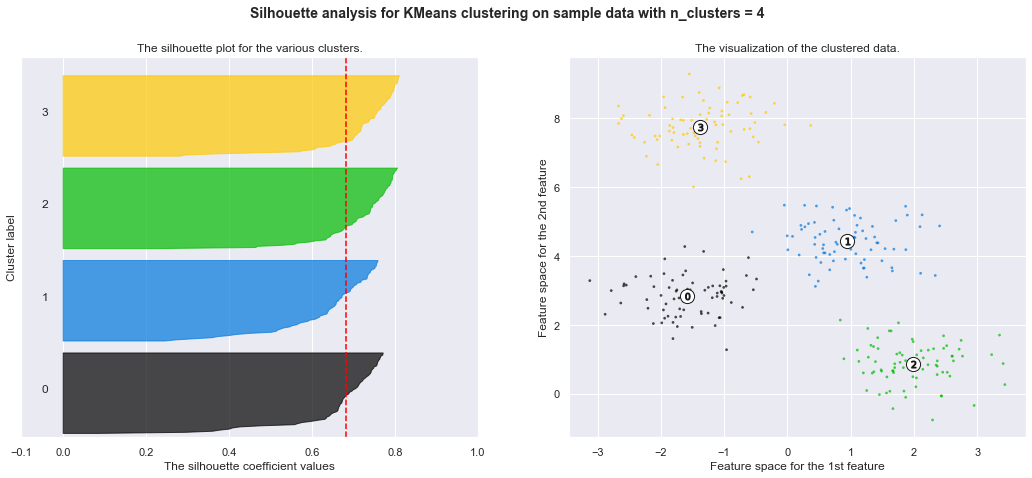

In [14]:
y_lower = n_clusters
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
silhouette_avg = silhouette_score(X, cluster_labels)
for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

# Labeling the clusters
centers = model.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Silhouette score

In [11]:
# [2] Import metric
from sklearn.metrics import  silhouette_score

In [ ]:
?silhouette_score

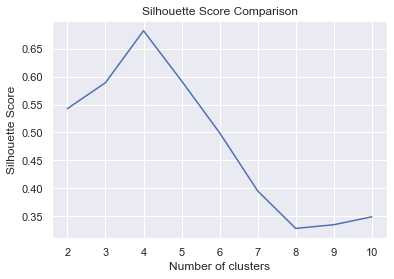

In [12]:
# Select metric
metric_f = silhouette_score

# Initialize vector of metrics
metrics = []

# Try values from k = 2 to k = 10
for i in range(2, 11):
    # [3] Define model
    model = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state=0)
    
    # [4] Train model
    model.fit(X)
    # [5] Predict
    cluster_pred = model.predict(X)
    
    # [6] Evaluate model
    metrics.append(metric_f(X, cluster_pred))

# Plot results
plt.plot(range(2, 11), metrics)
plt.title('Silhouette Score Comparison')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

## [3] Calinski-Harabasz Index

Calinski-Harabasz Index is also known as the Variance Ratio Criterion.

The score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion. The C-H Index is a great way to evaluate the performance of a Clustering algorithm as it does not require information on the ground truth labels.

The higher the Index, the better the performance.

The formula is:

<img src="figures/form_1.gif" width="50%">

where tr(Bk) is trace of the between group dispersion matrix and tr(Wk) is the trace of the within-cluster dispersion matrix defined by:

<img src="figures/form_2.gif" width="50%">

<img src="figures/form_3.gif" width="50%">

In [15]:
# [2] Import metric
from sklearn.metrics import calinski_harabasz_score

In [16]:
?calinski_harabasz_score

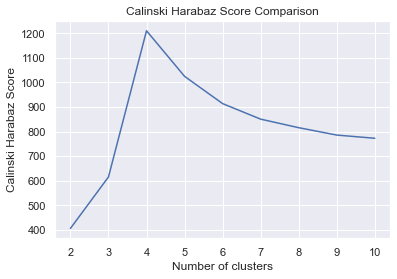

In [17]:
# Select metric
metric_f = calinski_harabasz_score

# Initialize vector of metrics
metrics = []

# Try values from k = 2 to k = 10
for i in range(2, 11):
    # [3] Define model
    model = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state=0)
    
    # [4] Train model
    model.fit(X)
    # [5] Predict
    cluster_pred = model.predict(X)
    
    # [6] Evaluate model
    metrics.append(metric_f(X, cluster_pred))

# Plot results
plt.plot(range(2, 11), metrics)
plt.title('Calinski Harabaz Score Comparison')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabaz Score')
plt.show()

## [4] Davies-Bouldin Index

The Davies-Bouldin Index is defined as the average similarity measure of each cluster with its most similar cluster. Similarity is the ratio of within-cluster distances to between-cluster distances. In this way, clusters which are farther apart and less dispersed will lead to a better score.

Is similar to the opposite of Calinski Harabaz score.

The minimum score is zero, and differently from most performance metrics, the lower values the better clustering performance.

In [18]:
# [2] Import metric
from sklearn.metrics import davies_bouldin_score

In [19]:
?davies_bouldin_score

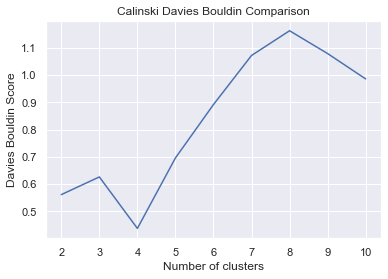

In [20]:
# Select metric
metric_f = davies_bouldin_score

# Initialize vector of metrics
metrics = []

# Try values from k = 2 to k = 10
for i in range(2, 11):
    # [3] Define model
    model = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state=0)
    
    # [4] Train model
    model.fit(X)
    # [5] Predict
    cluster_pred = model.predict(X)
    
    # [6] Evaluate model
    metrics.append(metric_f(X, cluster_pred))

# Plot results
plt.plot(range(2, 11), metrics)
plt.title('Davies Bouldin Comparison')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()